# A Semi-automatic Classification of Normal Karyotypes using Convolutional Neural Network Algorithm

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

## Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

%matplotlib inline

## Load the Datasets

In [2]:
X_train = np.load('X_train_2D_KaryoLearning_Abnormal.npy')
y_train = np.load('y_train_2D_KaryoLearning_Abnormal.npy')

X_test = np.load('X_test_2D_KaryoLearning_Abnormal.npy')
y_test = np.load('y_test_2D_KaryoLearning_Abnormal.npy')

## Convolutional Neural Network

## Data Preparation

In [3]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### Training

#### Model

In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(32, activation='softmax'))

#### Tensorboard Initilization

In [7]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#### Compile the modal

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/50
  1/207 [..............................] - ETA: 0s - loss: 44.1625 - accuracy: 0.0000e+00WARNING:tensorflow:From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
207/207 [==============================] - 141s 680ms/step - loss: 59.3129 - accuracy: 0.3358 - val_loss: 2.8502 - val_accuracy: 0.3968
Epoch 2/50
207/207 [==============================] - 145s 701ms/step - loss: 1.1749 - accuracy: 0.6866 - val_loss: 1.6392 - val_accuracy: 0.6286
Epoch 3/50
207/207 [==============================] - 144s 694ms/step - loss: 3.1958 - accuracy: 0.6225 - val_loss: 3.7228 - val_accuracy: 0.1143
Epoch 4/50
207/207 [==============================] - 140s 674ms/step - loss: 2.2928 - accuracy: 0.4023 - val_loss: 2.1663 - val_accuracy: 0.5270
Epoch 5/50
207/207 [==============================] - 14

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 322624)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               9

### Tensorboard Display

In [11]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 3392), started 3:34:22 ago. (Use '!kill 3392' to kill it.)

## Performance Measures

In [12]:
#y_predict = clf.predict(X_test)
#y_test = y_test

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.032


In [13]:
len(X_test)

315

In [14]:
y_predict = model.predict(X_test)

In [15]:
len(y_predict)

315

In [16]:
y_predict[12]

array([0.06536737, 0.03624562, 0.0398487 , 0.0341662 , 0.03641907,
       0.04345462, 0.03505174, 0.03780483, 0.03933259, 0.05734077,
       0.03503587, 0.04339746, 0.03661479, 0.03929201, 0.03777086,
       0.0382923 , 0.03581487, 0.03618426, 0.05085168, 0.03446079,
       0.03479684, 0.02973074, 0.03286536, 0.01214066, 0.00644125,
       0.0059754 , 0.00720041, 0.00633683, 0.02062218, 0.00501191,
       0.00657585, 0.01955619], dtype=float32)

In [17]:
# The number 34 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [18]:
y_predict_filtered[12]

0

In [19]:
len(y_predict_filtered)

315

In [20]:
len(y_test)

315

### Confusion Matrix (混淆矩阵)

In [21]:
label = ['chr_01', 'chr_02', 'chr_03',  'chr_04', 'chr_05', 'chr_06', 'chr_07',  'chr_08',  'chr_09', 'chr_10',
'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15',  'chr_16', 'chr_17', 'chr_18', 'chr_19',  'chr_20',  
'chr_21', 'chr_22', 'chr_x', 'chr_y',  'chr_18_p11_deletion', 'chr_18_q10_isochromosome', 
'chr_9_inversion', 'chr_5_p14_deletion', 
'chr_x_isochromosome', 'chr_x_p22_cnv', 'chr_x_q21_cnv',  'chr_x_q22_deletion']

In [22]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,
                                                                   10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
                                                                  20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                                                  30, 31]))
confusion = pd.DataFrame(cm, index=label,
                        columns=label)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN.csv')
confusion

,chr_01,chr_02,chr_03,chr_04,chr_05,chr_06,chr_07,chr_08,chr_09,chr_10,...,chr_x,chr_y,chr_18_p11_deletion,chr_18_q10_isochromosome,chr_9_inversion,chr_5_p14_deletion,chr_x_isochromosome,chr_x_p22_cnv,chr_x_q21_cnv,chr_x_q22_deletion
chr_01,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_02,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_03,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_04,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_05,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_06,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_07,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_08,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_09,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr_10,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
print(classification_report(y_test, y_predict_filtered))

              precision    recall  f1-score   support

           0       0.03      1.00      0.06        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00        10
          17       0.00    

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


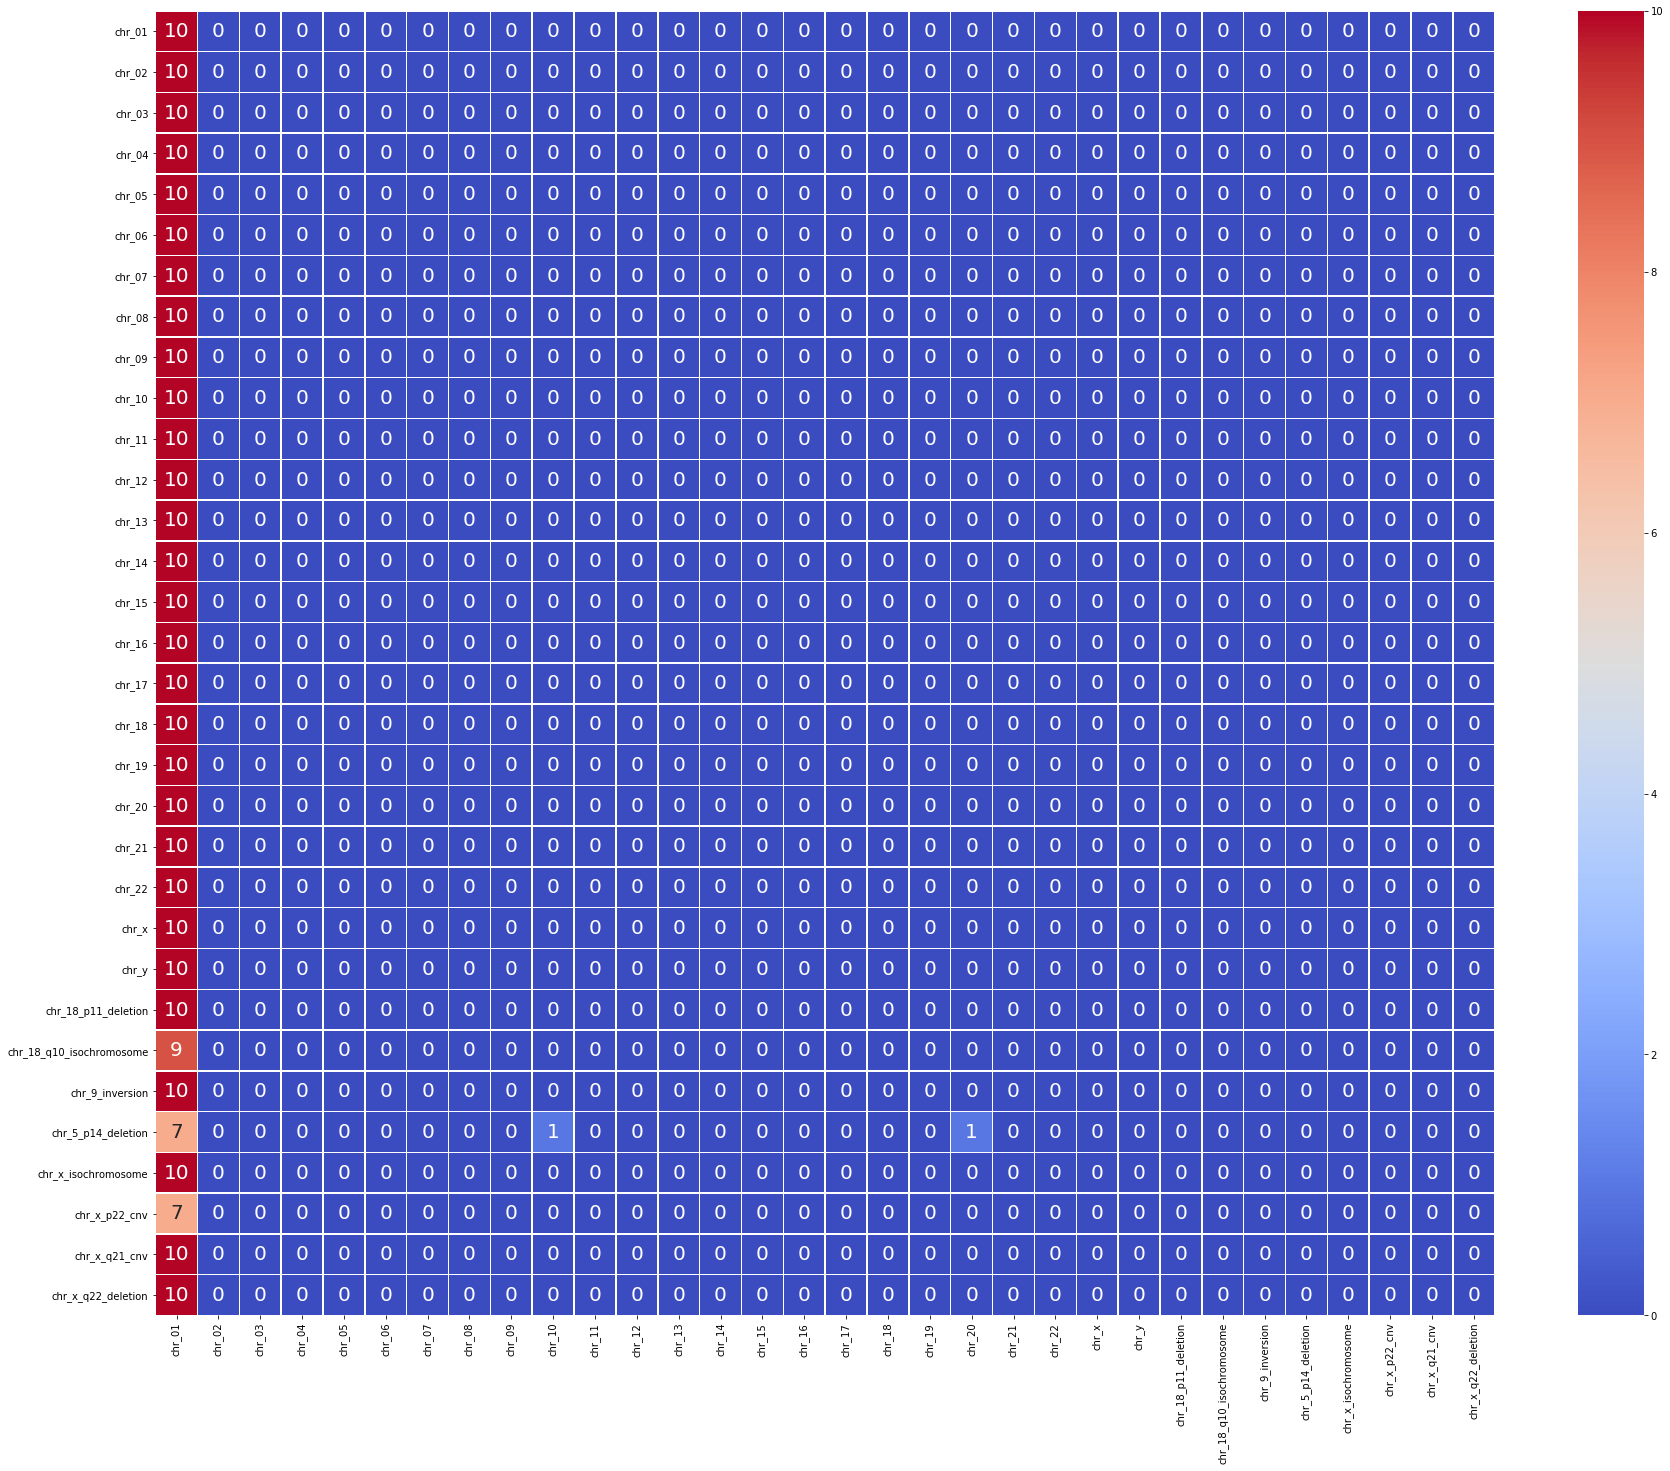

In [24]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})

## Save the Model

In [25]:
model.save('saved_model/model_cnn')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/model_cnn\assets


## Load the Model

In [26]:
model_reload = keras.models.load_model('saved_model/model_cnn')